In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [10]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [11]:
data.index = pd.to_datetime(data.index)

In [17]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [18]:
split_1 = int(len(data) * 0.6)
split_2 = int(len(data) * 0.9)
data_in = data[ : split_1]
data_out = data[split_1 : split_2]
data_hold = data[split_2 : ]

In [19]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,1:]

In [20]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [21]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [22]:
import matplotlib.pyplot as plt

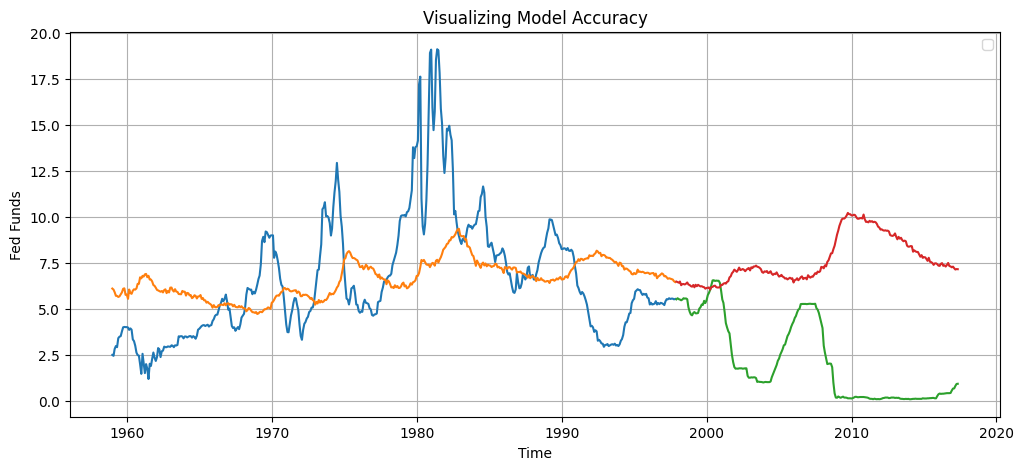

In [24]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(model1.predict(X_in))
plt.plot(y_out)
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [29]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
degrees = 2
poly = PolynomialFeatures(degree = degrees)
X_poly_in = poly.fit_transform(X_in)
X_poly_out = poly.transform(X_out)

In [34]:
X_poly_out

array([[1.00000000e+00, 1.00000000e+00, 4.70000000e+00, ...,
        2.45235600e+06, 2.53378800e+05, 2.61792400e+04],
       [1.00000000e+00, 1.00000000e+00, 4.60000000e+00, ...,
        2.32562500e+06, 2.47050000e+05, 2.62440000e+04],
       [1.00000000e+00, 1.00000000e+00, 4.60000000e+00, ...,
        2.50905600e+06, 2.56608000e+05, 2.62440000e+04],
       ...,
       [1.00000000e+00, 1.00000000e+00, 4.40000000e+00, ...,
        1.41610000e+06, 2.90231480e+05, 5.94833077e+04],
       [1.00000000e+00, 1.00000000e+00, 4.40000000e+00, ...,
        1.31331600e+06, 2.79845178e+05, 5.96302212e+04],
       [1.00000000e+00, 1.00000000e+00, 4.40000000e+00, ...,
        1.33864900e+06, 2.82312628e+05, 5.95379520e+04]])

degree =  1


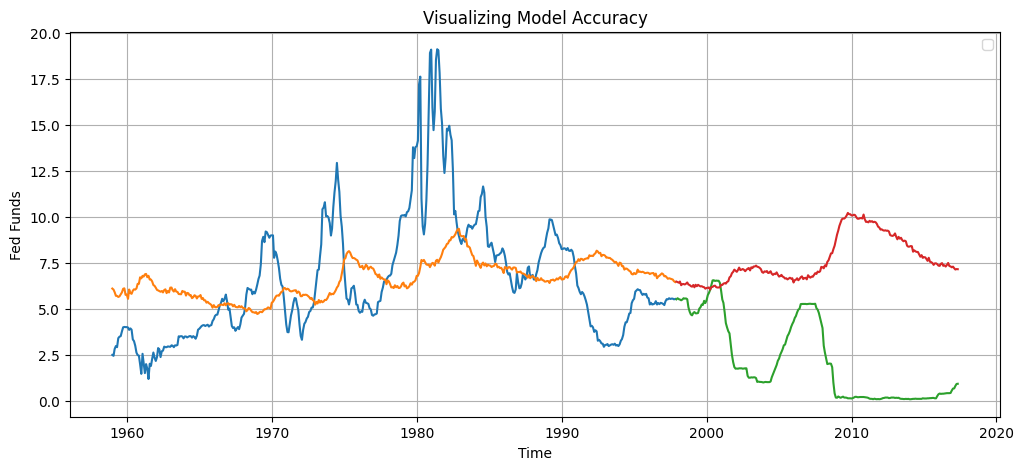

Insample MSE :  10.071422013168641
Outsample MSE :  40.3608278356679


degree =  2


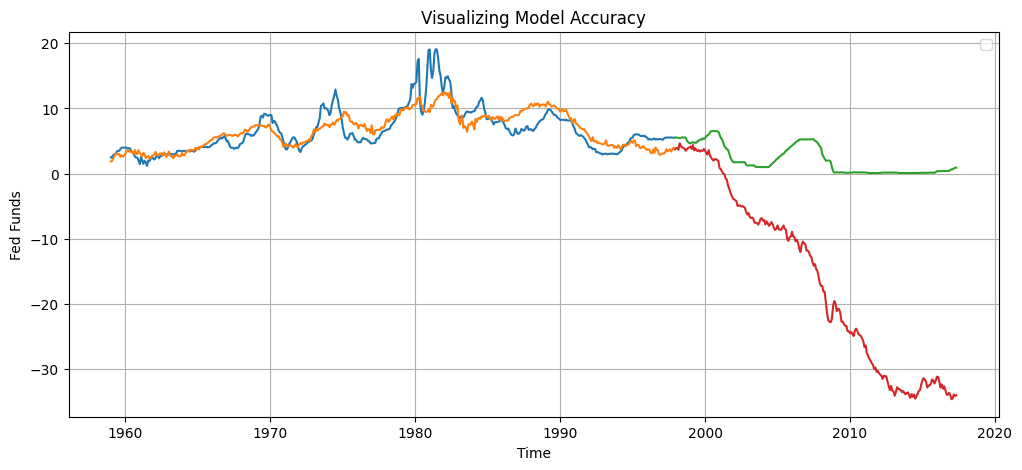

Insample MSE :  3.8634771392760685
Outsample MSE :  481.4465099296677


degree =  3


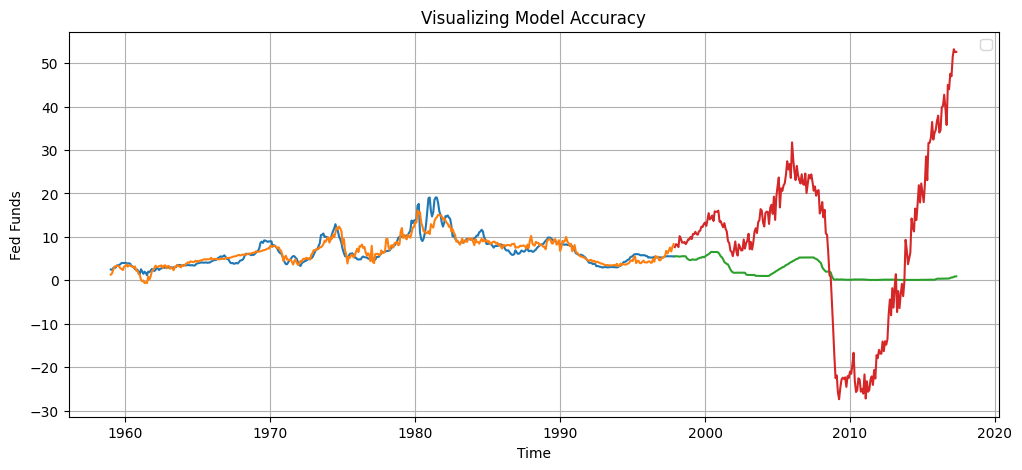

Insample MSE :  1.87236362674367
Outsample MSE :  371.76813140712045




In [47]:
max_degree = 3
for degrees in range(1, max_degree + 1):
    print('degree = ', degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_poly_in = poly.fit_transform(X_in)
    X_poly_out = poly.transform(X_out)

    model2 = sm.OLS(y_in, X_poly_in).fit()

    plt.figure(figsize = (12,5))
    
    plt.plot(y_in)
    plt.plot(y_in.index, model2.predict(X_poly_in))
    plt.plot(y_out)
    plt.plot(y_out.index, model2.predict(X_poly_out))

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()

    in_mse_1 = mean_squared_error(model2.predict(X_poly_in), y_in)
    out_mse_1 = mean_squared_error(model2.predict(X_poly_out), y_out)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print('\n')
    

# 7.) State your observations :

With the increase of model complexity, the model with have a lower bias towards the real data. However, there will be the problem of overfitting, as the model fits better the in-sample data, the model couldn't explain the out-of-sample data well. This can be justified by the difference between in-sample MSE and out-sample MSE.